In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\manth\Downloads\diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# check the number of rows and columns
df.shape

(100000, 9)

In [4]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# check the statistical Analysis
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
# check the null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
# check the duplicated values
df.duplicated(keep = False).sum()

6939

C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


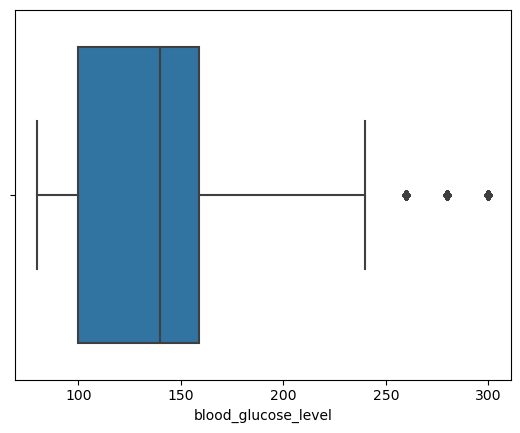

In [8]:
# check the outliers
sns.boxplot(df['blood_glucose_level'])
plt.show()

C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


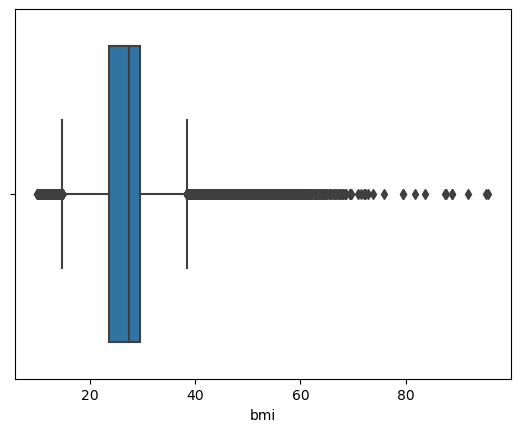

In [9]:
sns.boxplot(df['bmi'])
plt.show()

C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


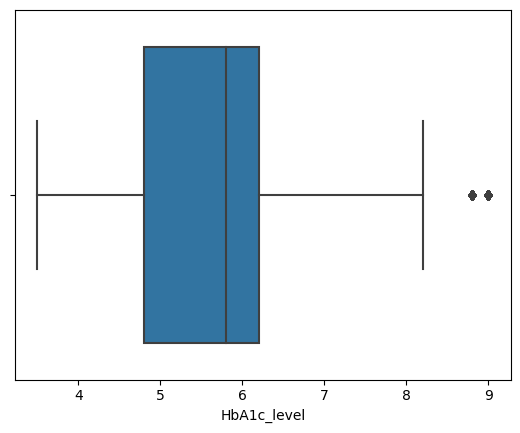

In [10]:
sns.boxplot(df['HbA1c_level'])
plt.show()

In [11]:
q1,q3 = np.percentile(df['blood_glucose_level'],[25,75])
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outlier = df['blood_glucose_level'][(df['blood_glucose_level']<lower)|(df['blood_glucose_level']>upper)]
print(outlier)
print(min(outlier))

38       260
94       300
104      280
125      280
142      300
        ... 
99763    280
99826    300
99867    300
99938    300
99957    280
Name: blood_glucose_level, Length: 2038, dtype: int64
260


In [12]:
# remove outliers
df = df[df['blood_glucose_level']<=250]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [13]:
q1,q3 = np.percentile(df['bmi'],[25,75])
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outlier = df['bmi'][(df['bmi']<lower)|(df['bmi']>upper)]
print(outlier)
print(min(outlier))
print(max(outlier))

11       54.70
24       13.99
39       56.43
59       63.48
93       55.61
         ...  
99948    39.62
99953    60.52
99960    45.15
99962    38.31
99993    40.69
Name: bmi, Length: 7082, dtype: float64
10.01
95.69


In [14]:
df = df[df['bmi']<=40]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [15]:
q1,q3 = np.percentile(df['HbA1c_level'],[25,75])
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outlier = df['HbA1c_level'][(df['HbA1c_level']<lower)|(df['HbA1c_level']>upper)]
print(outlier)
print(min(outlier))
print(max(outlier))

40       9.0
55       9.0
135      9.0
169      9.0
299      9.0
        ... 
99509    8.8
99523    8.8
99706    9.0
99740    9.0
99929    8.8
Name: HbA1c_level, Length: 887, dtype: float64
8.8
9.0


In [16]:
df = df[df['HbA1c_level']<=8.5]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


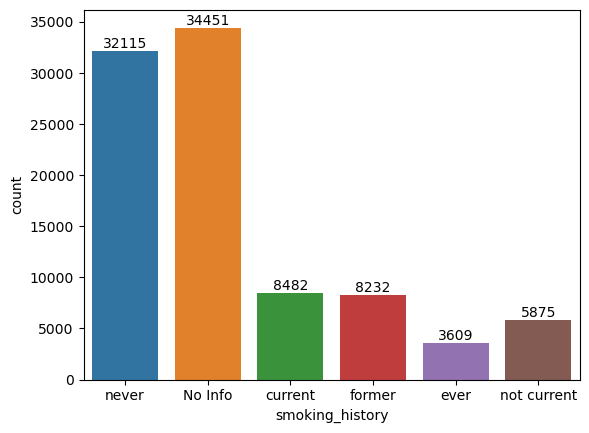

In [18]:
# data visulization
a = sns.countplot(df['smoking_history'])
for i in a.containers:
    a.bar_label(i,)
plt.show()

In [19]:
b = df['gender'].value_counts()

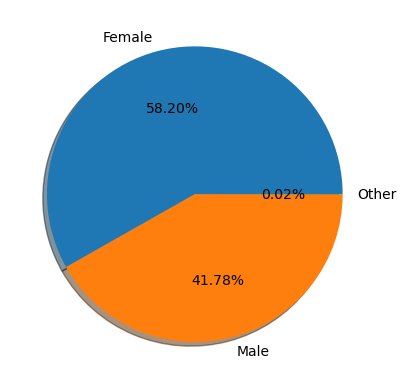

In [24]:
plt.pie(x = b.values,labels = b.index,autopct = '%.2f%%',shadow=True)
plt.show()

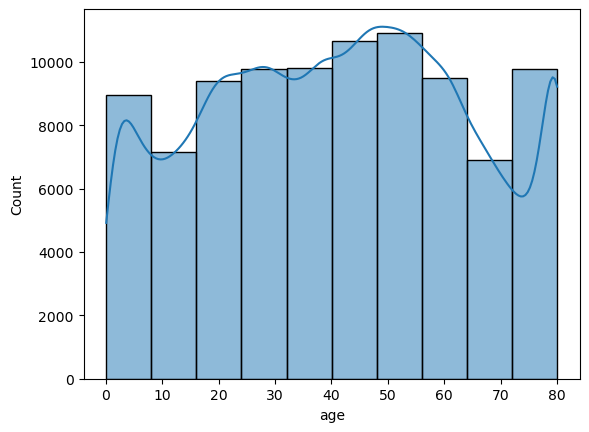

In [25]:
sns.histplot(df['age'],kde = True,bins = 10)
plt.show()

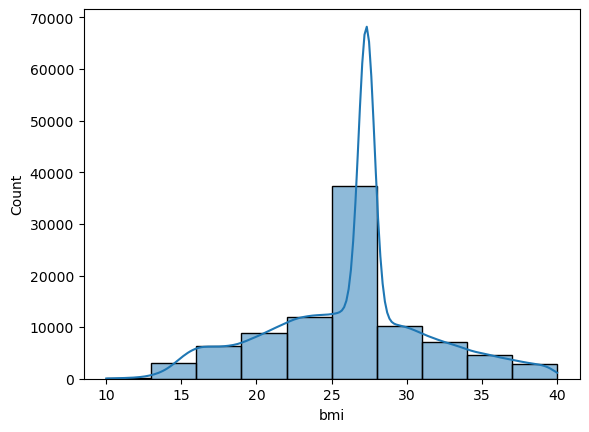

In [27]:
sns.histplot(df['bmi'],kde = True,bins = 10)
plt.show()

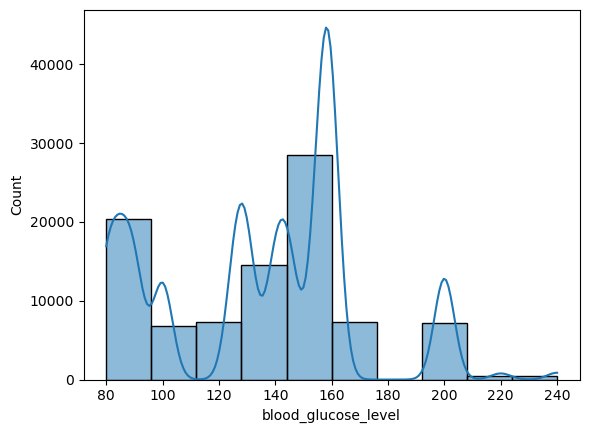

In [28]:
sns.histplot(df['blood_glucose_level'],kde = True,bins = 10)
plt.show()

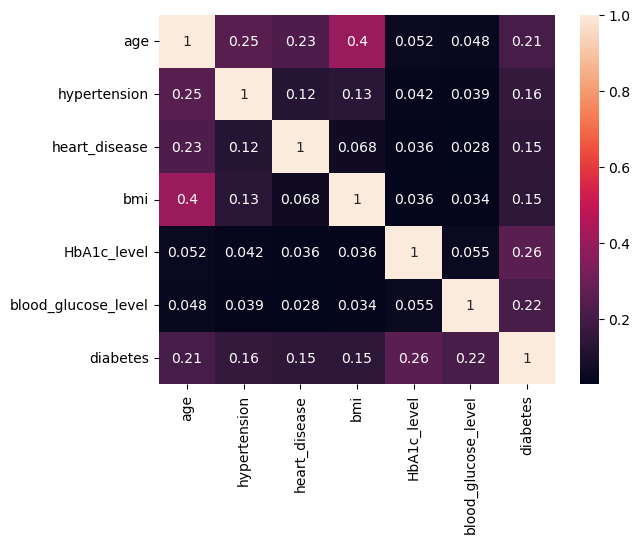

In [29]:
cor = df.corr()
sns.heatmap(cor,annot = True)
plt.show()

In [30]:
x = df.drop('diabetes',axis = 1)
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [31]:
y = df['diabetes']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 92764, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [36]:
columns = make_column_transformer((OneHotEncoder(sparse=False),['gender','smoking_history']),remainder='passthrough')

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [40]:
pipe = make_pipeline(columns,model)

In [41]:
pipe.fit(x_train,y_train)

C:\Users\manth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('logisticregression', LogisticRegression())])

In [42]:
pipe.score(x_test,y_test)

0.9619468549560718

In [45]:
y_pre = pipe.predict(x_test)
y_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
y_test

79829    0
90453    0
73504    0
14564    0
29043    0
        ..
97525    0
26085    1
54793    0
97054    0
96783    1
Name: diabetes, Length: 18553, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pre)

0.9619468549560718